In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image
import seaborn as sns

Using TensorFlow backend.


In [2]:
#Defining paths
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#Getting parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [7]:
#Training the model
hist_new = model.fit_generator(
    train_generator,
    steps_per_epoch=1,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps=1
)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1/1 [==============================] - 18s 18s/step - loss: 0.6770 - accuracy: 0.6250 - val_loss: 0.6465 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 15s 15s/step - loss: 1.0839 - accuracy: 0.7500 - val_loss: 0.8257 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 18s 18s/step - loss: 1.6295 - accuracy: 0.5625 - val_loss: 0.6745 - val_accuracy: 0.9375
Epoch 4/100
1/1 [==============================] - 18s 18s/step - loss: 0.6661 - accuracy: 0.5938 - val_loss: 0.6870 - val_accuracy: 0.4286
Epoch 5/100
1/1 [==============================] - 19s 19s/step - loss: 0.6078 - accuracy: 0.7500 - val_loss: 0.6741 - val_accuracy: 0.5312
Epoch 6/100
1/1 [==============================] - 19s 19s/step - loss: 0.7839 - accuracy: 0.5312 - val_loss: 0.6744 - val_accuracy: 0.7143
Epoch 7/100
1/1 [==============================] - 20s 20s/step - loss: 0.6759 - accuracy: 0.5625 - val_loss: 0.

Epoch 58/100
1/1 [==============================] - 25s 25s/step - loss: 0.1790 - accuracy: 0.9375 - val_loss: 0.0212 - val_accuracy: 1.0000
Epoch 59/100
1/1 [==============================] - 369s 369s/step - loss: 0.2587 - accuracy: 0.9062 - val_loss: 0.0252 - val_accuracy: 1.0000
Epoch 60/100
1/1 [==============================] - 26s 26s/step - loss: 0.1942 - accuracy: 0.9375 - val_loss: 0.0595 - val_accuracy: 0.9643
Epoch 61/100
1/1 [==============================] - 23s 23s/step - loss: 0.5711 - accuracy: 0.9375 - val_loss: 0.0572 - val_accuracy: 0.9688
Epoch 62/100
1/1 [==============================] - 20s 20s/step - loss: 0.0547 - accuracy: 0.9688 - val_loss: 0.1011 - val_accuracy: 0.9643
Epoch 63/100
1/1 [==============================] - 26s 26s/step - loss: 0.0283 - accuracy: 1.0000 - val_loss: 0.0509 - val_accuracy: 1.0000
Epoch 64/100
1/1 [==============================] - 25s 25s/step - loss: 0.0513 - accuracy: 0.9688 - val_loss: 0.1007 - val_accuracy: 0.9643
Epoch 65/10

In [8]:
#Getting summary
summary=hist_new.history
print(summary)

{'val_loss': [0.6464937329292297, 0.8257222175598145, 0.6745102405548096, 0.6870107650756836, 0.6740931272506714, 0.6743651628494263, 0.6865942478179932, 0.6496978402137756, 0.6502243280410767, 0.6386764645576477, 0.6272788047790527, 0.6131327748298645, 0.5803495049476624, 0.575302004814148, 0.5350492000579834, 0.5306635499000549, 0.43220698833465576, 0.43382200598716736, 0.3872022032737732, 0.38207656145095825, 0.43886229395866394, 0.44946327805519104, 0.4391184449195862, 0.34256574511528015, 0.32839369773864746, 0.20684003829956055, 0.19043073058128357, 0.34308862686157227, 0.35598698258399963, 0.33538952469825745, 0.375871479511261, 0.3224816918373108, 0.2971422076225281, 0.2270445078611374, 0.22532138228416443, 0.20253852009773254, 0.2364283949136734, 0.19370295107364655, 0.2326039969921112, 0.37770429253578186, 0.23360919952392578, 0.10095163434743881, 0.0841512531042099, 0.15330539643764496, 0.13135038316249847, 0.16939318180084229, 0.1760837435722351, 0.16070543229579926, 0.1874

In [9]:
model.save("model_covid.h5")

In [10]:
model.evaluate_generator(train_generator)

[0.0718597024679184, 0.9866071343421936]

In [11]:
print(model.evaluate_generator(validation_generator))

[0.09260102361440659, 0.9833333492279053]


In [12]:
#confusion matrix
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [13]:
y_actual, y_test = [],[]

In [14]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(1)

In [15]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test.append(pred[0,0])
    y_actual.append(0)

In [16]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

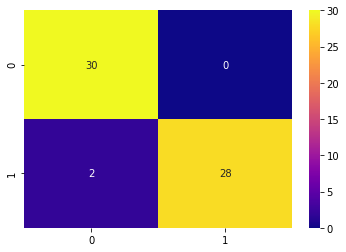

In [18]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal

In [19]:
y_actual

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
summary['loss']

[0.6769666075706482,
 1.083940029144287,
 1.629516363143921,
 0.666104257106781,
 0.6077962517738342,
 0.7838565111160278,
 0.6758826971054077,
 0.6660348176956177,
 0.7065092325210571,
 0.6659741997718811,
 0.6397513151168823,
 0.535515546798706,
 0.6107840538024902,
 0.49676796793937683,
 0.43288540840148926,
 0.5065911412239075,
 0.4162310063838959,
 0.3420999348163605,
 0.6547585129737854,
 0.39123469591140747,
 0.4470100700855255,
 0.33871400356292725,
 0.3252277374267578,
 0.29664546251296997,
 0.1778717190027237,
 0.31227919459342957,
 0.25096070766448975,
 0.18084222078323364,
 0.5001167058944702,
 0.3828052878379822,
 0.2917640805244446,
 0.28448012471199036,
 0.2088155299425125,
 0.1863289177417755,
 0.3053695559501648,
 0.14934708178043365,
 0.40309345722198486,
 0.30990082025527954,
 0.2021753489971161,
 0.3102472424507141,
 0.3466417193412781,
 0.1558801829814911,
 0.4345317780971527,
 0.40827932953834534,
 0.14587298035621643,
 0.17466652393341064,
 0.1035359799861908,
 0

In [22]:
summary['val_loss']

[0.6464937329292297,
 0.8257222175598145,
 0.6745102405548096,
 0.6870107650756836,
 0.6740931272506714,
 0.6743651628494263,
 0.6865942478179932,
 0.6496978402137756,
 0.6502243280410767,
 0.6386764645576477,
 0.6272788047790527,
 0.6131327748298645,
 0.5803495049476624,
 0.575302004814148,
 0.5350492000579834,
 0.5306635499000549,
 0.43220698833465576,
 0.43382200598716736,
 0.3872022032737732,
 0.38207656145095825,
 0.43886229395866394,
 0.44946327805519104,
 0.4391184449195862,
 0.34256574511528015,
 0.32839369773864746,
 0.20684003829956055,
 0.19043073058128357,
 0.34308862686157227,
 0.35598698258399963,
 0.33538952469825745,
 0.375871479511261,
 0.3224816918373108,
 0.2971422076225281,
 0.2270445078611374,
 0.22532138228416443,
 0.20253852009773254,
 0.2364283949136734,
 0.19370295107364655,
 0.2326039969921112,
 0.37770429253578186,
 0.23360919952392578,
 0.10095163434743881,
 0.0841512531042099,
 0.15330539643764496,
 0.13135038316249847,
 0.16939318180084229,
 0.176083743572

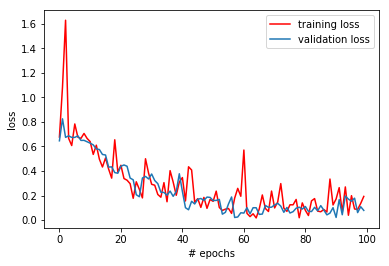

In [23]:
from matplotlib import pyplot as plt

plt.plot(summary['loss'],'r',label='training loss')
plt.plot(summary['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [24]:
summary['val_accuracy']

[0.5,
 0.5,
 0.9375,
 0.4285714328289032,
 0.53125,
 0.7142857313156128,
 0.4375,
 0.5714285969734192,
 0.96875,
 0.6428571343421936,
 0.71875,
 0.75,
 0.90625,
 0.8571428656578064,
 0.625,
 0.7857142686843872,
 0.96875,
 0.8928571343421936,
 0.9375,
 0.9642857313156128,
 0.9375,
 0.8928571343421936,
 0.84375,
 0.9285714030265808,
 0.84375,
 0.9642857313156128,
 0.96875,
 0.9285714030265808,
 0.875,
 1.0,
 0.9375,
 1.0,
 0.9375,
 0.9285714030265808,
 0.9375,
 0.8928571343421936,
 0.875,
 0.9285714030265808,
 0.9375,
 0.9642857313156128,
 0.96875,
 1.0,
 1.0,
 0.9642857313156128,
 0.96875,
 1.0,
 0.96875,
 1.0,
 0.96875,
 1.0,
 0.96875,
 1.0,
 0.96875,
 1.0,
 0.96875,
 0.9642857313156128,
 0.9375,
 1.0,
 1.0,
 0.9642857313156128,
 0.96875,
 0.9642857313156128,
 1.0,
 0.9642857313156128,
 0.96875,
 1.0,
 1.0,
 0.9642857313156128,
 0.96875,
 1.0,
 0.96875,
 1.0,
 0.96875,
 1.0,
 0.96875,
 0.9642857313156128,
 1.0,
 1.0,
 0.96875,
 1.0,
 1.0,
 1.0,
 0.96875,
 1.0,
 1.0,
 0.9642857313156128

In [25]:
summary['accuracy']

[0.625,
 0.75,
 0.5625,
 0.59375,
 0.75,
 0.53125,
 0.5625,
 0.59375,
 0.46875,
 0.625,
 0.71875,
 0.6875,
 0.6875,
 0.78125,
 0.90625,
 0.75,
 0.8125,
 0.875,
 0.75,
 0.8125,
 0.84375,
 0.90625,
 0.875,
 0.9375,
 0.9375,
 0.875,
 0.875,
 0.90625,
 0.84375,
 0.875,
 0.90625,
 0.9375,
 0.9375,
 0.9375,
 0.90625,
 0.9375,
 0.8125,
 0.875,
 0.9375,
 0.90625,
 0.78125,
 1.0,
 0.875,
 0.90625,
 0.90625,
 0.9375,
 0.96875,
 0.90625,
 0.96875,
 0.90625,
 0.96875,
 0.90625,
 0.96875,
 1.0,
 0.96875,
 0.96875,
 1.0,
 0.9375,
 0.90625,
 0.9375,
 0.9375,
 0.96875,
 1.0,
 0.96875,
 1.0,
 0.9375,
 0.9375,
 0.96875,
 0.96875,
 0.9375,
 0.96875,
 0.96875,
 0.9375,
 0.96875,
 1.0,
 0.9375,
 0.9375,
 0.96875,
 1.0,
 0.9375,
 0.96875,
 1.0,
 0.9375,
 0.96875,
 0.96875,
 1.0,
 0.96875,
 0.96875,
 0.90625,
 0.96875,
 0.96875,
 0.90625,
 0.96875,
 0.9375,
 1.0,
 0.90625,
 0.96875,
 0.96875,
 0.9375,
 0.9375]

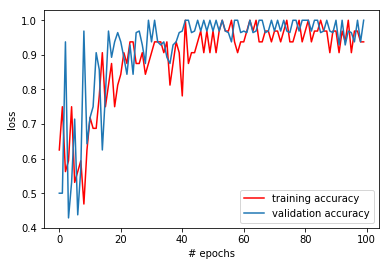

In [26]:
plt.plot(summary['accuracy'],'r',label='training accuracy')
plt.plot(summary['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### thank you!!!
from shikha